Fra:1 Mem:33.15M (Peak 33.15M) | Time:00:00.00 | Syncing Light
Fra:1 Mem:33.15M (Peak 33.15M) | Time:00:00.00 | Syncing Camera
Fra:1 Mem:33.16M (Peak 33.16M) | Time:00:00.00 | Syncing Sphere
Fra:1 Mem:33.37M (Peak 33.37M) | Time:00:00.00 | Syncing Sphere.001
Fra:1 Mem:33.59M (Peak 33.59M) | Time:00:00.00 | Syncing Sphere.002
Fra:1 Mem:33.80M (Peak 33.80M) | Time:00:00.00 | Rendering 1 / 64 samples
Fra:1 Mem:33.66M (Peak 33.80M) | Time:00:00.13 | Rendering 26 / 64 samples
Fra:1 Mem:33.72M (Peak 33.80M) | Time:00:00.24 | Rendering 51 / 64 samples
Fra:1 Mem:33.66M (Peak 33.80M) | Time:00:00.30 | Rendering 64 / 64 samples
Saved: 'test_sphere.png'
 Time: 00:00.33 (Saving: 00:00.02)



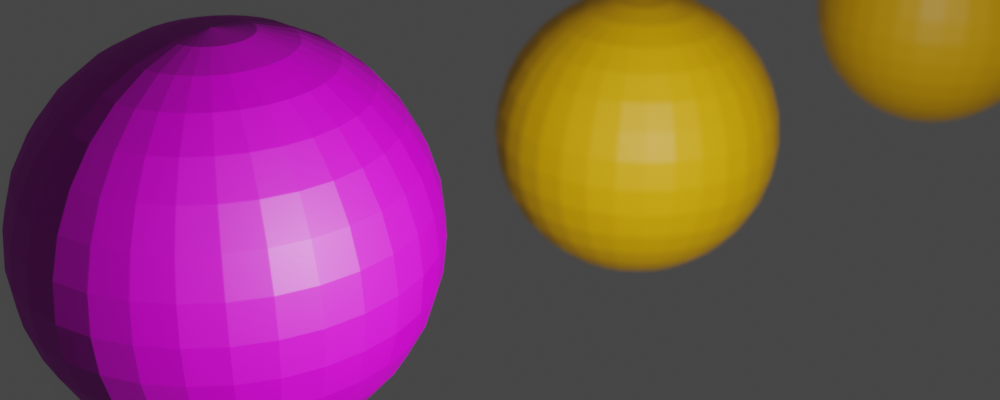

In [46]:
import bpy
from IPython.display import Image, display

def make_sphere(color, location):
    bpy.ops.mesh.primitive_uv_sphere_add(
        radius=1,
        enter_editmode=False,
        align="WORLD",
        location=location
    )
    sphere = bpy.context.active_object

    # Create a material with the provided color
    material = bpy.data.materials.new(name=f"Material {color}")
    material.use_nodes = True
    nodes = material.node_tree.nodes
    nodes["Principled BSDF"].inputs["Base Color"].default_value = color
    sphere.data.materials.append(material)

# Clear all existing mesh objects
bpy.ops.object.select_all(action="DESELECT")
bpy.ops.object.select_by_type(type="MESH")
bpy.ops.object.delete()

light = bpy.data.objects["Light"]
light.location = (4, 0, 2)  # Position the light to the left of the spheres

# Define colors (R, G, B, A)
blue = (0.2, 0.2, 1, 1)
purple = (0.5, 0, 0.5, 1)
orange = (1, 0.5, 0, 1)

# Call the make_sphere function
make_sphere(purple, (0, 0, 1))
make_sphere(orange, (-1, 4, 0))
make_sphere(orange, (-1, 8, 0))

# Render settings
bpy.context.scene.render.resolution_x = 1000
bpy.context.scene.render.resolution_y = 400
bpy.context.scene.render.image_settings.file_format = "PNG"
bpy.context.scene.render.filepath = "test_sphere.png"


camera = bpy.data.objects["Camera"]
focus_distance = 6
camera.location = (5, -3, 4)
camera.data.dof.use_dof = True
camera.data.dof.focus_distance = focus_distance
camera.data.dof.aperture_fstop = 0.5  # Adjust this value to control blur amount



# Render the image
bpy.ops.render.render(write_still=True)

# Save the image to the specified filepath
bpy.data.images["Render Result"].save_render(filepath=bpy.context.scene.render.filepath)

display(Image("test_sphere.png"))